Dataset loaded successfully.
       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311  
Dataset shape: (15039, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  f

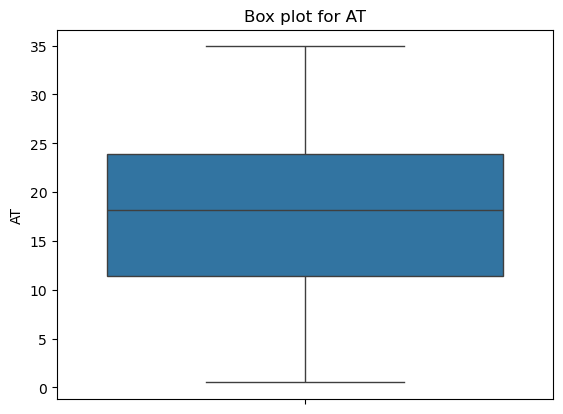

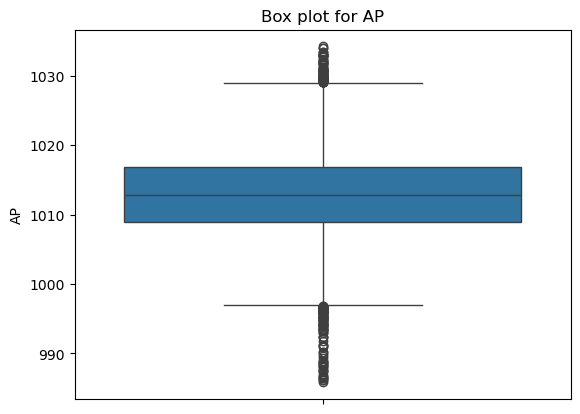

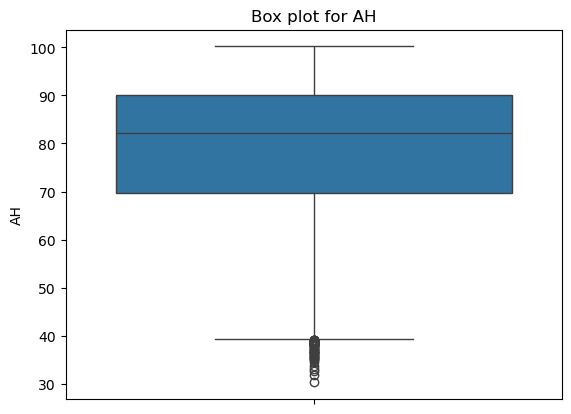

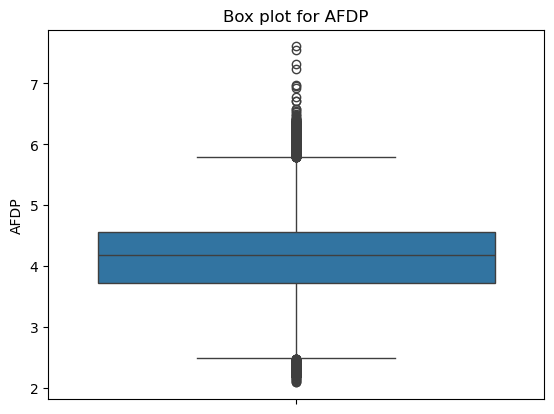

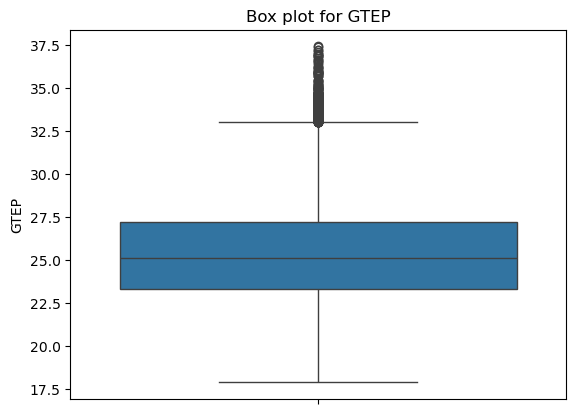

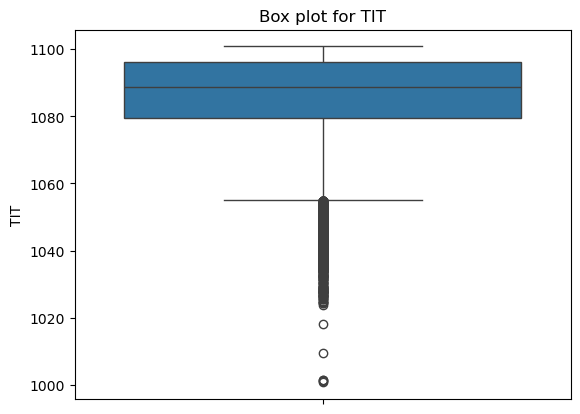

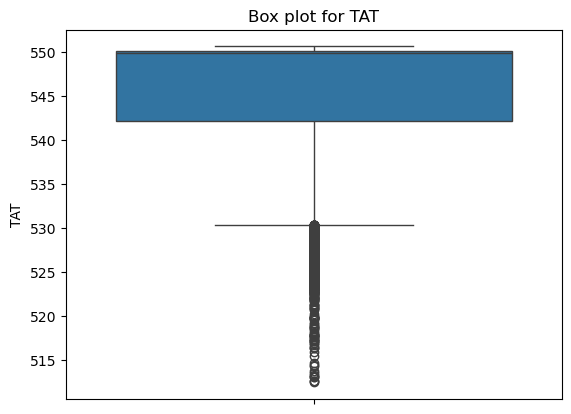

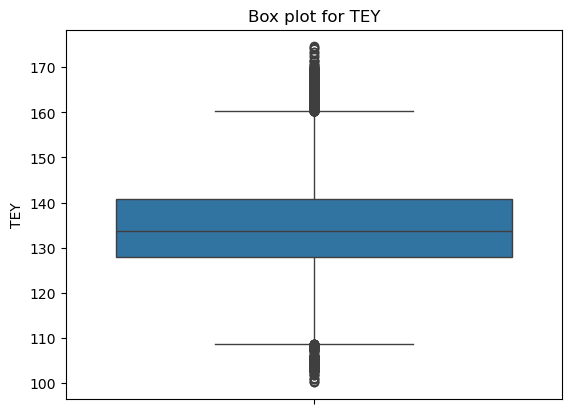

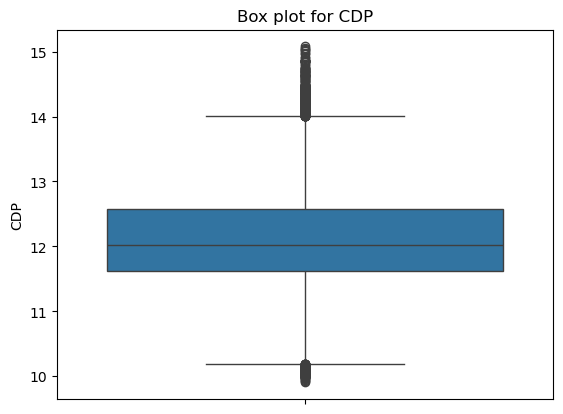

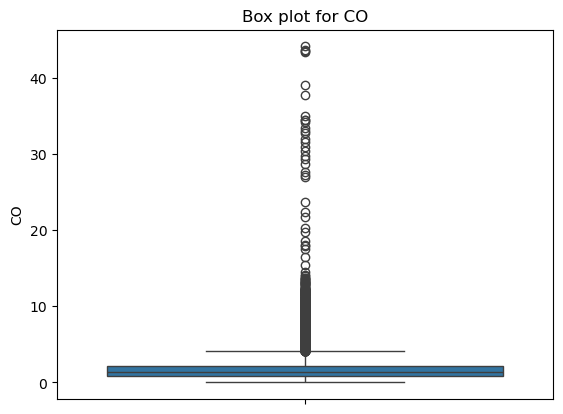

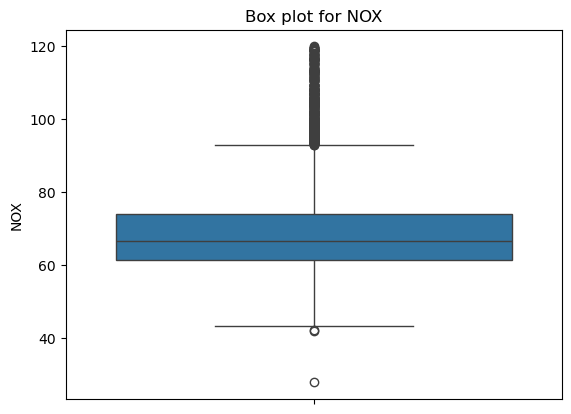

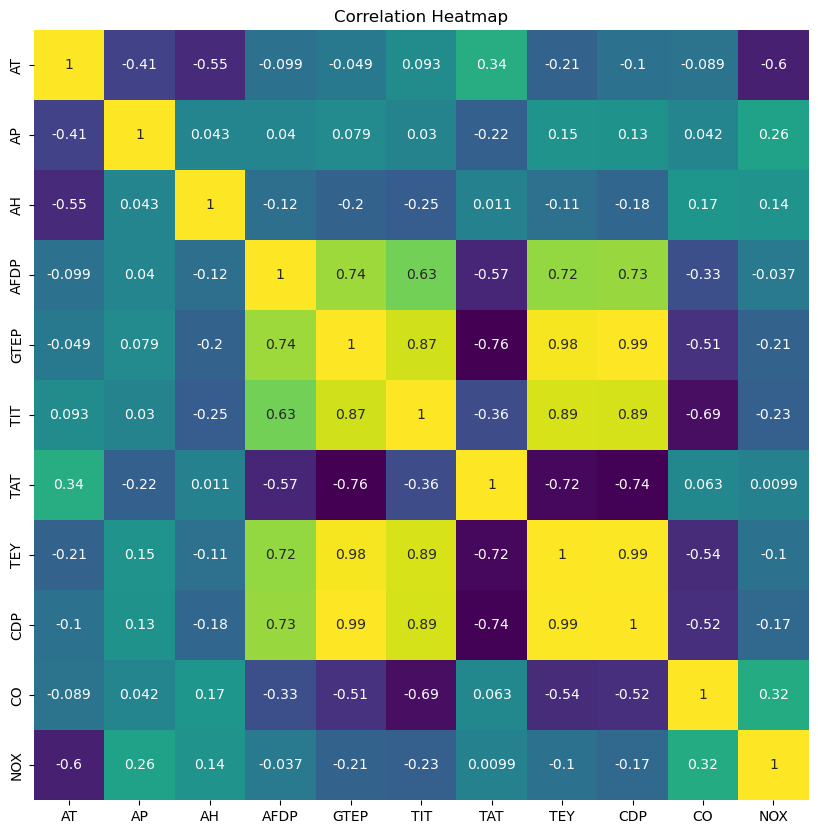

Epoch 1/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.6538 - mae: 2.6538 - val_loss: 0.3073 - val_mae: 0.3073
Epoch 2/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1943 - mae: 0.1943 - val_loss: 0.0473 - val_mae: 0.0473
Epoch 3/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0511 - mae: 0.0511 - val_loss: 0.0367 - val_mae: 0.0367
Epoch 4/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0334 - mae: 0.0334 - val_loss: 0.0278 - val_mae: 0.0278
Epoch 5/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0308 - mae: 0.0308 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 6/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0281 - mae: 0.0281 - val_loss: 0.0280 - val_mae: 0.0280
Epoch 7/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0192 - val_mae: 0.0192
Epoch 8/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0173 - val_mae: 0.0173
Epoch 9/40
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

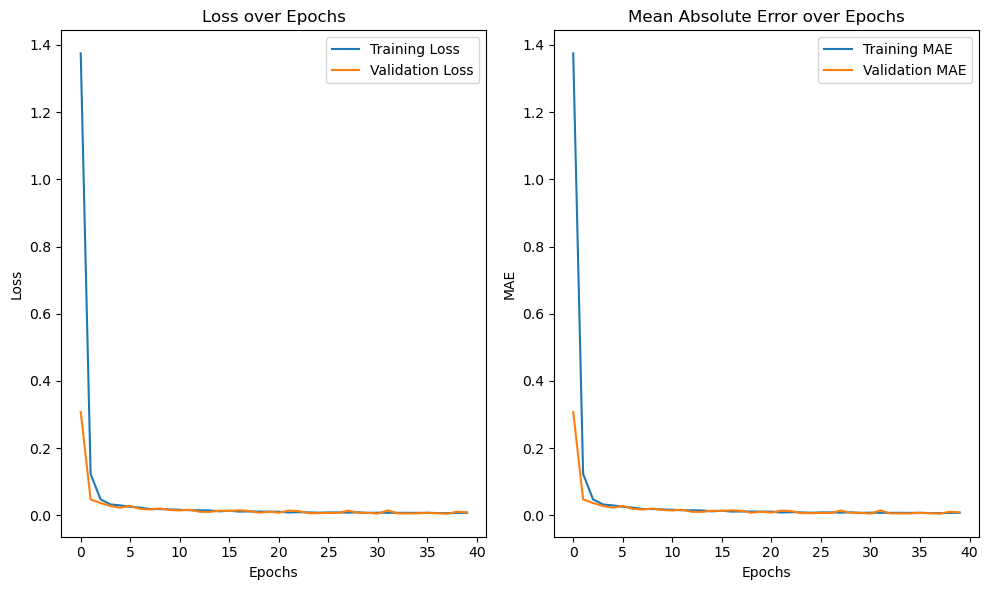

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² score: 0.9924
MSE: 0.0001
MAE: 0.0086
Execution time: 52.21 seconds


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle
import warnings
import time

# Suppress warnings
warnings.filterwarnings('ignore')

# Start timer
start_time = time.time()

# Load dataset
turbine = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 24th/Final Assignment/gas_turbines.csv")
print("Dataset loaded successfully.")
print(turbine.head())

# Preliminary exploration of the dataset
print(f"Dataset shape: {turbine.shape}")
print(turbine.info())

# Data cleaning
# Check for missing values
if turbine.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    print("Missing values detected.")

# Check for duplicates
duplicates = turbine.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for outliers using boxplots
num_cols = turbine.select_dtypes(include=[np.float64])
for col in num_cols:
    plt.figure()
    sns.boxplot(data=turbine[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel(col)
    plt.show()

# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=turbine.corr(), annot=True, cmap='viridis', cbar=False)
plt.title("Correlation Heatmap")
plt.show()

# Remove highly correlated variables to mitigate multicollinearity
turbine.drop(['TIT', 'CDP'], axis=1, inplace=True)

# Preparing data for modeling
X = turbine.drop(columns=['TEY'])
y = np.log(turbine['TEY'])  # Log transformation to stabilize variance

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the ANN model
ann = Sequential()
ann.add(Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=1, activation='linear'))

# Compiling the model
ann.compile(optimizer='adam', loss='mae', metrics=["mae"])

# Fitting the model
model_history = ann.fit(X_train, y_train, validation_split=0.33, epochs=40)

# Plotting training history
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['mae'], label='Training MAE')
plt.plot(model_history.history['val_mae'], label='Validation MAE')
plt.title("Mean Absolute Error over Epochs")
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Model evaluation
ann_pred = ann.predict(X_test)
ann_r2 = r2_score(y_test, ann_pred)
ann_mse = mean_squared_error(y_test, ann_pred)
ann_mae = mean_absolute_error(y_test, ann_pred)

print(f'R² score: {ann_r2:.4f}')
print(f'MSE: {ann_mse:.4f}')
print(f'MAE: {ann_mae:.4f}')

# Model and scaler saving
ann.save('ann_model.keras')
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Execution time
end_time = time.time()
print(f'Execution time: {end_time - start_time:.2f} seconds')
